In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump

df = pd.read_csv("dataset.csv")

X = df.drop(columns=["Module Name", "Signal Name", "Depth"])
Y = df["Depth"]

print("Training Features:", X.columns.tolist())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

dump(model, "model.joblib")
print("Model saved as model.joblib")

mae   = mean_absolute_error(Y_test, Y_pred)
mse   = mean_squared_error(Y_test, Y_pred)
rmse  = np.sqrt(mse)
r2    = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Training Features: ['Gates', 'Fan-In', 'Fan-Out']
Model saved as model.joblib
Mean Absolute Error (MAE): 0.4166666666666667
Mean Squared Error (MSE): 0.375
Root Mean Squared Error (RMSE): 0.6123724356957945
R-squared (R2) Score: 0.775


In [13]:
import pandas as pd
from joblib import load

loaded_model = load("model.joblib")

test_circuits = {
    "3-to-8 Decoder": [10, 3, 1],
    "2-bit Comparator": [8, 2, 2],
    "4-bit Priority Encoder": [12, 3, 1],
    "2-bit ALU": [16, 3, 2],
    "2-bit Up/Down Counter": [10, 2, 2]
}

test_df = pd.DataFrame.from_dict(test_circuits, orient="index", columns=["Gates", "Fan-In", "Fan-Out"])

predicted_depths = loaded_model.predict(test_df)

print("\nPredicted Combinational Depth for New RTL Designs:")
for circuit, depth in zip(test_circuits.keys(), predicted_depths):
    print(f"{circuit}: {depth:.2f}")



Predicted Combinational Depth for New RTL Designs:
3-to-8 Decoder: 4.00
2-bit Comparator: 2.00
4-bit Priority Encoder: 4.00
2-bit ALU: 4.00
2-bit Up/Down Counter: 2.00


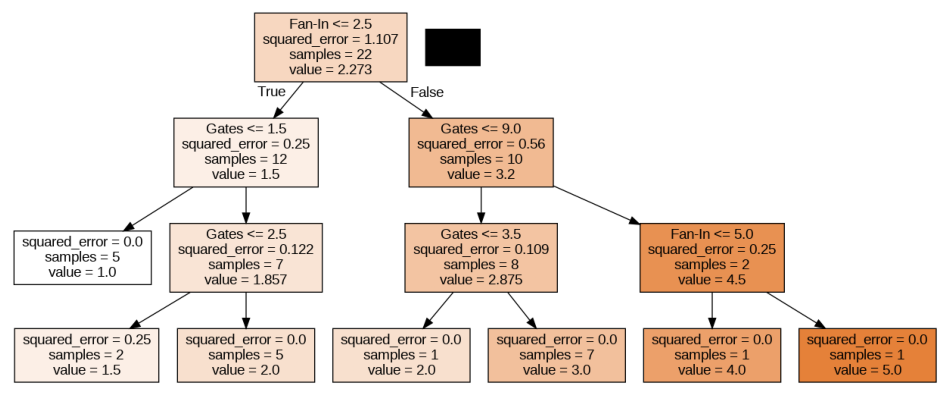

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from joblib import load

model = load("model.joblib")

features = ["Gates", "Fan-In", "Fan-Out"]

dot_data = export_graphviz(model, filled=True, rounded=True, feature_names=features, out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")

image = mpimg.imread("decision_tree.png")
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.show()
